## Setup and Import

In [1]:
# Install psycopg2 if needed
# pip install psycopg2

In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [3]:
# Import database link
from config import database

In [4]:
# Create engine and connect to database
# pypi.org/project/psycopg2/
engine = create_engine(database)
connection = engine.connect()

## Inspect Tables

In [5]:
# Get table names
inspector = inspect(engine)
inspector.get_table_names()

['departments', 'dept_manager', 'employees', 'salaries', 'dept_emp', 'titles']

In [6]:
# Use Inspector to print the column names and types of the salaries table
columns = inspector.get_columns('salaries')
for c in columns:
    print(c['name'], c["type"])

emp_no INTEGER
salary INTEGER


In [7]:
# Use Inspector to print the column names and types of the employees table
columns = inspector.get_columns('employees')
for c in columns:
    print(c['name'], c["type"])

emp_no INTEGER
emp_title_id VARCHAR(30)
birth_date DATE
first_name VARCHAR(30)
last_name VARCHAR(30)
sex VARCHAR(1)
hire_date DATE


In [8]:
# Use Inspector to print the column names and types of the titles table
columns = inspector.get_columns('titles')
for c in columns:
    print(c['name'], c["type"])

title_id VARCHAR(10)
title VARCHAR(30)


## Create Data Frames

In [9]:
# Put salaries into a dataframe
# https://datatofish.com/sql-to-pandas-dataframe/

salary = pd.read_sql("SELECT * FROM salaries", connection)
salary_df = pd.DataFrame(salary, columns=['emp_no','salary'])
salaries_final = salary_df.rename(columns={"emp_no": "Employee Number", "salary": "Salary"})
salaries_final

,Employee Number,Salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [10]:
# Put employees into a dataframe
# https://datatofish.com/sql-to-pandas-dataframe/

employee = pd.read_sql("SELECT * FROM employees", connection)
employee_df = pd.DataFrame(employee, columns=['emp_no','emp_title_id'])
employee_final = employee_df.rename(columns={"emp_no": "Employee Number", "emp_title_id": "Title ID"})
employee_final

,Employee Number,Title ID
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003
...,...,...
300019,464231,s0001
300020,255832,e0002
300021,76671,s0001
300022,264920,s0001


In [11]:
# Put titles into a dataframe
# https://datatofish.com/sql-to-pandas-dataframe/

title = pd.read_sql("SELECT * FROM titles", connection)
title_df = pd.DataFrame(title, columns=['title_id','title'])
title_final = title_df.rename(columns={"title_id": "Title ID", "title": "Title"})
title_final

,Title ID,Title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


## Merge Data Frames

In [12]:
# Merge the employee and salaries tables together
emp_sal = pd.merge(employee_final, salaries_final, on="Employee Number", how="inner")
emp_sal

,Employee Number,Title ID,Salary
0,473302,s0001,40000
1,475053,e0002,53422
2,57444,e0002,48973
3,421786,s0001,40000
4,282238,e0003,40000
...,...,...,...
300019,464231,s0001,69696
300020,255832,e0002,75355
300021,76671,s0001,61886
300022,264920,s0001,62772


In [13]:
# Merge with the titles table
emp_sal_titles = pd.merge(emp_sal, title_final, on="Title ID", how="inner")
emp_sal_titles

,Employee Number,Title ID,Salary,Title
0,473302,s0001,40000,Staff
1,421786,s0001,40000,Staff
2,273487,s0001,56087,Staff
3,246449,s0001,87084,Staff
4,48085,s0001,63016,Staff
...,...,...,...,...
300019,111400,m0001,72446,Manager
300020,111133,m0001,71148,Manager
300021,110085,m0001,60026,Manager
300022,110386,m0001,40000,Manager


## Analyze Data

In [14]:
dataframe_final =  emp_sal_titles[['Title', 'Salary']]
dataframe_final

,Title,Salary
0,Staff,40000
1,Staff,40000
2,Staff,56087
3,Staff,87084
4,Staff,63016
...,...,...
300019,Manager,72446
300020,Manager,71148
300021,Manager,60026
300022,Manager,40000


### Salary Ranges

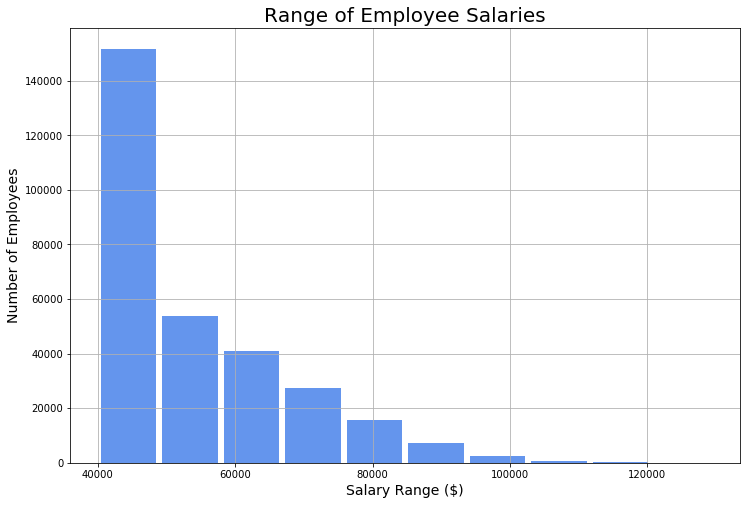

In [15]:
dataframe_final.hist(column='Salary', figsize=(12,8), color='cornflowerblue', rwidth=0.9)

# Format Chart
plt.title("Range of Employee Salaries", fontsize = 20)
plt.xlabel("Salary Range ($)", fontsize = 14)
plt.ylabel("Number of Employees", fontsize = 14)

# Save image
plt.savefig("images/Range_of_Employee_Salaries.png")

plt.show()

### Average Salary by Title

In [16]:
data_groupby = dataframe_final.groupby(["Title"]).mean()["Salary"].round(2)
data_groupby_pd = pd.DataFrame(data_groupby).sort_values("Salary", ascending=False)
data_groupby_pd

,Salary
Title,
Senior Staff,58550.17
Staff,58465.38
Manager,51531.04
Technique Leader,48582.90
Assistant Engineer,48564.43
Engineer,48535.34
Senior Engineer,48506.80


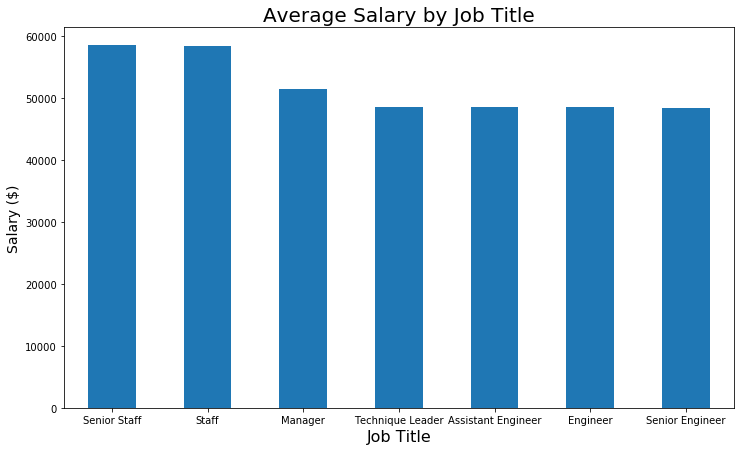

In [17]:
data_groupby_pd.plot(kind="bar", figsize=(12,7), rot=0, legend=False, fontsize = 10)


# Format chart
plt.title("Average Salary by Job Title", fontsize=20)
plt.xlabel("Job Title", fontsize=16)
plt.ylabel("Salary ($)", fontsize=14)


# Save image
plt.savefig("images/Salary_by_Title.png")

plt.show()

### Epilogue

In [18]:
# Look up employee ID 
employee = pd.read_sql("SELECT * FROM employees", connection)
my_id_df = pd.DataFrame(employee)
my_id_final = my_id_df.rename(columns={"emp_no": "Employee Number", "emp_title_id": "Title ID", "birth_date": "Birth Date",
                                      "first_name": "First Name", "last_name": "Last Name", "sex": "Sex", "hire_date": "Hire Date"})

my_id_final.loc[my_id_final['Employee Number'] == 499942]

,Employee Number,Title ID,Birth Date,First Name,Last Name,Sex,Hire Date
168736,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
